## Data Preprocessing for Trip Advisor AIML project

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 

from langdetect import detect
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import ast
import time
import string 
from spacy.lang.en import English
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/envs/aiml25-ma3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/aiml25-ma3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/envs/aiml25-ma3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.sta

True

#### Importing the data 

Importing the Review and Offering data from Trip Advisor

In [2]:
#specify CSV path
csv_path = './reviews.csv'

#creating a df from the file
df_review = pd.read_csv(csv_path)

df_review.head(5)

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False


In [3]:
#we are just interested in the ratings overall

df_review['ratings'] = df_review['ratings'].apply(ast.literal_eval)
df_review['rating_overall'] = df_review['ratings'].apply(lambda x: x.get('overall', None))
df_review.drop(columns=['ratings'], inplace=True)

In [4]:
df_review.head(10)

,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,rating_overall
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,5.0
2,“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,4.0
3,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,4.0
4,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,4.0
5,"“One of NYC's Best Hotels, Hands Down”",Excellent staff (they remembered our names fro...,"{'username': 'Breakonacloud-com', 'num_reviews...",December 2012,1776857,0,2012-12-19,147762928,False,5.0
6,“Apartment living for less than most 5 stars”,"I stayed at the Setai for 3 nights last week, ...","{'username': 'French1976', 'num_cities': 2, 'n...",December 2012,1776857,0,2012-12-18,147681943,False,5.0
7,“Lovely stay at The Chatwal”,My husband and I stayed at The Chatwal for 9 n...,"{'username': 'ilkim', 'num_cities': 6, 'num_he...",April 2012,1641016,0,2012-12-20,147769675,False,5.0
8,“Exclusive boutique hôtel”,Wonderful boutique hotel located next to Times...,"{'username': 'otisokansascity', 'num_cities': ...",December 2012,1641016,0,2012-12-19,147722090,False,5.0
9,“A Nice Stay for NYC!”,This hotel is a nice stay for NYC because the ...,"{'username': 'nikkigfoster', 'num_cities': 13,...",December 2012,1456560,0,2012-12-19,147759101,False,4.0


In [5]:
df_review.shape

(878561, 10)

Now lets import the offerings file

In [6]:
#specify path
csv_path = './offerings.csv'

#create df from file
df_offering = pd.read_csv(csv_path)

df_offering.head(5)

,hotel_class,region_id,url,phone,details,address,type,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '147 West 4...",hotel,113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,"{'region': 'CA', 'street-address': '300 S Dohe...",hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '790 Eighth...",hotel,99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '152 West 5...",hotel,93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '130 West 4...",hotel,217616,The Muse Hotel New York


In [7]:
#we are just interested in the address locality

df_offering['address'] = df_offering['address'].apply(ast.literal_eval)
df_offering['address_locality'] = df_offering['address'].apply(lambda x: x.get('locality', None))
df_offering.drop(columns=['address'], inplace=True)

In [8]:
df_offering.head(10)

,hotel_class,region_id,url,phone,details,type,id,name,address_locality
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,113317,Casablanca Hotel Times Square,New York City
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills,Los Angeles
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,99352,Hilton Garden Inn Times Square,New York City
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,93589,The Michelangelo Hotel,New York City
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,217616,The Muse Hotel New York,New York City
5,4.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,208454,Sofitel New York,New York City
6,NaN,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,2643161,The NoMad Hotel,New York City
7,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,1465162,Staybridge Suites Times Square - New York City,New York City
8,4.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,93559,The Sherry-Netherland Hotel,New York City
9,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,hotel,80112,San Carlos Hotel,New York City


In [9]:
df_offering.shape

(4333, 9)

Using inner join to merge the two datasets to get the "adress.locality" from the offerings dataset. This is to be used to filter the dataset based on location.

In [10]:
df_merged = pd.merge(df_review, df_offering, left_on='offering_id', right_on='id', how='inner')

In [11]:
df_merged = df_merged[['text', 'rating_overall',"address_locality"]]

In [12]:
df_merged.head(5)

,text,rating_overall,address_locality
0,Stayed in a king suite for 11 nights and yes i...,5.0,New York City
1,"On every visit to NYC, the Hotel Beacon is the...",5.0,New York City
2,This is a great property in Midtown. We two di...,4.0,New York City
3,The Andaz is a nice hotel in a central locatio...,4.0,New York City
4,I have stayed at each of the US Andaz properti...,4.0,New York City


In [13]:
df_merged.shape

(878561, 3)

#### Checking for duplicates and nan values

In [14]:
#counting duplicates
duplicate_count = df_merged.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

#droping duplicates
df_merged = df_merged.drop_duplicates()

#verifying that duplicates are removed
print(f"Number of duplicate rows after dropping: {df_merged.duplicated().sum()}")

Number of duplicate rows: 935
Number of duplicate rows after dropping: 0


In [15]:
nan_counts = df_merged.isnull().sum()
print(nan_counts)

text                0
rating_overall      0
address_locality    0
dtype: int64


#### Investigating the different collums further

In [16]:
#count the occurrences of each city
city_counts = df_merged['address_locality'].value_counts()

print(city_counts)

address_locality
New York City    266484
San Francisco     94837
Chicago           64486
San Diego         56607
Los Angeles       53351
Washington DC     48303
Boston            41863
Seattle           35503
San Antonio       28444
Philadelphia      22817
Houston           19579
Denver            18126
Dallas            17522
Phoenix           16278
Austin            15459
Baltimore         12701
Indianapolis      10967
Memphis           10861
Charlotte         10561
Columbus           8104
Jacksonville       7948
San Jose           5311
Fort Worth         4579
Detroit            3998
El Paso            2937
Name: count, dtype: int64


<Axes: title={'center': 'Count Reviews by Rating'}, xlabel='rating_overall'>

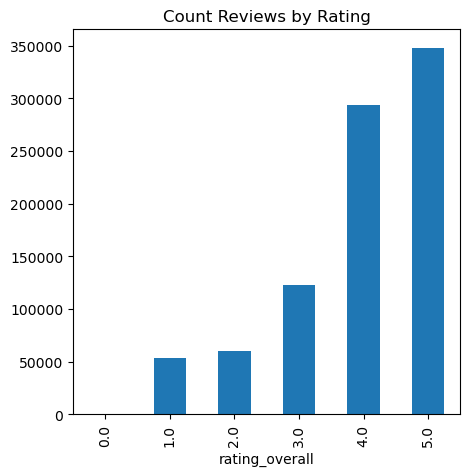

In [17]:
#visualizing the distribution of ratings
df_merged["rating_overall"].value_counts().sort_index().plot(kind="bar",title="Count Reviews by Rating", figsize=(5,5))

In [18]:
#calculating the length of each string in the Review column
review_lengths = df_merged['text'].apply(len)

#minimum, maximum, and average length of the column Review
print('Minimum length:', review_lengths.min())
print('Maximum length:', review_lengths.max())
print('Average length:', review_lengths.mean())

Minimum length: 4
Maximum length: 22387
Average length: 802.1717895777928


In [19]:
#removing all reviews containing more than 200 characters

df_merged = df_merged[df_merged['text'].str.len() < 200]

df_merged = df_merged[['text', 'rating_overall']]

df_merged.shape

(53007, 2)

### Pre processing

In [20]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return None

#applying a function to create a new column with the language code for each review
df_merged['language'] = df_merged['text'].apply(detect_lang)

#filtering the df to only include rows with english text
df_merged = df_merged[df_merged['language'] == 'en']
df_merged = df_merged[["text","rating_overall"]]
df_merged

,text,rating_overall
156,"Location, attention to detail, size of room, c...",5.0
306,You will not be dissapointed....wonderful beds...,5.0
359,"a very nice property, staff are very professio...",5.0
380,This is the best hotel I have ever lived in an...,5.0
392,I highly recommend a stay at this Best Western...,5.0
...,...,...
878342,Wonderful for pets! Great service and location.,5.0
878344,"Fantastic hotel! Beautiful, ideal location; wi...",5.0
878377,Beautiful Hotel. Loved the decor. Rooms were l...,5.0
878401,A fun place to stay. Very accesible to the pub...,5.0


In [21]:
#making sure all characters are lowercase
df_merged['text'] = df_merged['text'].str.lower()

In [ ]:
#saving a CSV file of the text for the Transfomer models 
df_merged.to_csv("data_preprocessed_general.csv", index=False)

### Tokenizing the data for BoW

In [22]:
#removing the stop words
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the text without puntuation
df_merged['clean_text']= df_merged['text'].apply(lambda x:remove_punctuation(x))

df_merged["text"] = df_merged["clean_text"]
df_merged = df_merged[["text","rating_overall"]]
df_merged

,text,rating_overall
156,location attention to detail size of room clea...,5.0
306,you will not be dissapointedwonderful beds bea...,5.0
359,a very nice property staff are very profession...,5.0
380,this is the best hotel i have ever lived in an...,5.0
392,i highly recommend a stay at this best western...,5.0
...,...,...
878342,wonderful for pets great service and location,5.0
878344,fantastic hotel beautiful ideal location wine ...,5.0
878377,beautiful hotel loved the decor rooms were lar...,5.0
878401,a fun place to stay very accesible to the publ...,5.0


In [23]:
nlp = English()
#creating an empty list to store the tokenized text
tokenized_text = []
#iterating over each row of the text column
for row in df_merged["text"]:
    #applying the spacy's english tokenizer to the text
    my_doc = nlp(row)

    #creating list of word tokens for the current row
    token_list = [token.text for token in my_doc]

    tokenized_text.append(token_list)

#adding the tokenized_text list as a new column to the df
df_merged["tokenized_text"] = tokenized_text

In [24]:

#stop words
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df_merged['tokenized_text']= df_merged['tokenized_text'].apply(lambda x:remove_stopwords(x))

In [25]:

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df_merged['msg_lemmatized']=df_merged['tokenized_text'].apply(lambda x:lemmatizer(x))

In [26]:
df_merged["text"] = df_merged["msg_lemmatized"]
df_merged = df_merged[["text","rating_overall"]]

In [27]:
df_merged

,text,rating_overall
156,"[location, attention, detail, size, room, clea...",5.0
306,"[dissapointedwonderful, bed, beautiful, room, ...",5.0
359,"[nice, property, staff, professional, room, sp...",5.0
380,"[best, hotel, ever, lived, lived, mostly, exte...",5.0
392,"[highly, recommend, stay, best, western, room,...",5.0
...,...,...
878342,"[wonderful, pet, great, service, location]",5.0
878344,"[fantastic, hotel, beautiful, ideal, location,...",5.0
878377,"[beautiful, hotel, loved, decor, room, large, ...",5.0
878401,"[fun, place, stay, accesible, public, transpor...",5.0


In [35]:
#saving a CSV file of the text with tokenization
df_merged.to_csv("data_tokenized_BoW.csv", index=False)